<a href="https://colab.research.google.com/github/rdambrosioz/aa_2021/blob/main/aa_tarea1_costanzo_dambrosio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1
Efectúe un profundo análisis exploratorio del dataset, incluyendo un estudio de 
correlación entre las variables del mismo. Explique detalladamente los métodos 
utilizados. Para obtener una representación gráfica de la correlación entre variables, se 
recomienda utilizar el método heatmap del paquete Seaborn [3]. Discuta 
detalladamente los resultados obtenidos.


In [1]:
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
wine_df = pd.read_csv('winequality-red.csv')

In [5]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine_df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [7]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<Figure size 1440x1440 with 0 Axes>

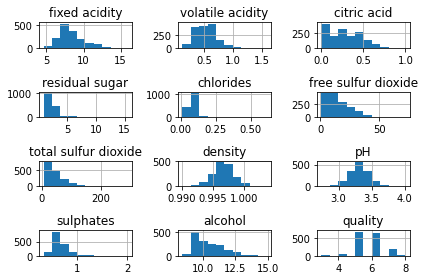

In [8]:
plt.figure(figsize=(20,20))
wine_df.hist()
plt.tight_layout()
plt.show()

In [9]:
correlations = wine_df.corr(method='pearson')
correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


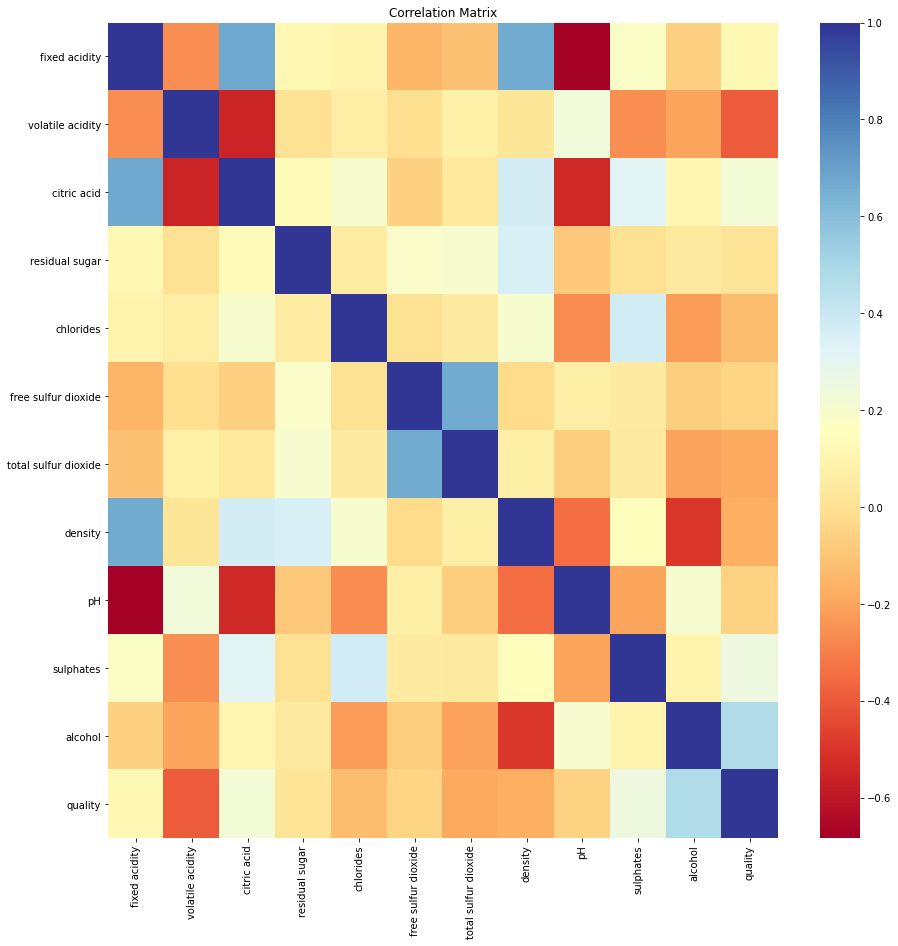

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(correlations, cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Pearson')
plt.show()

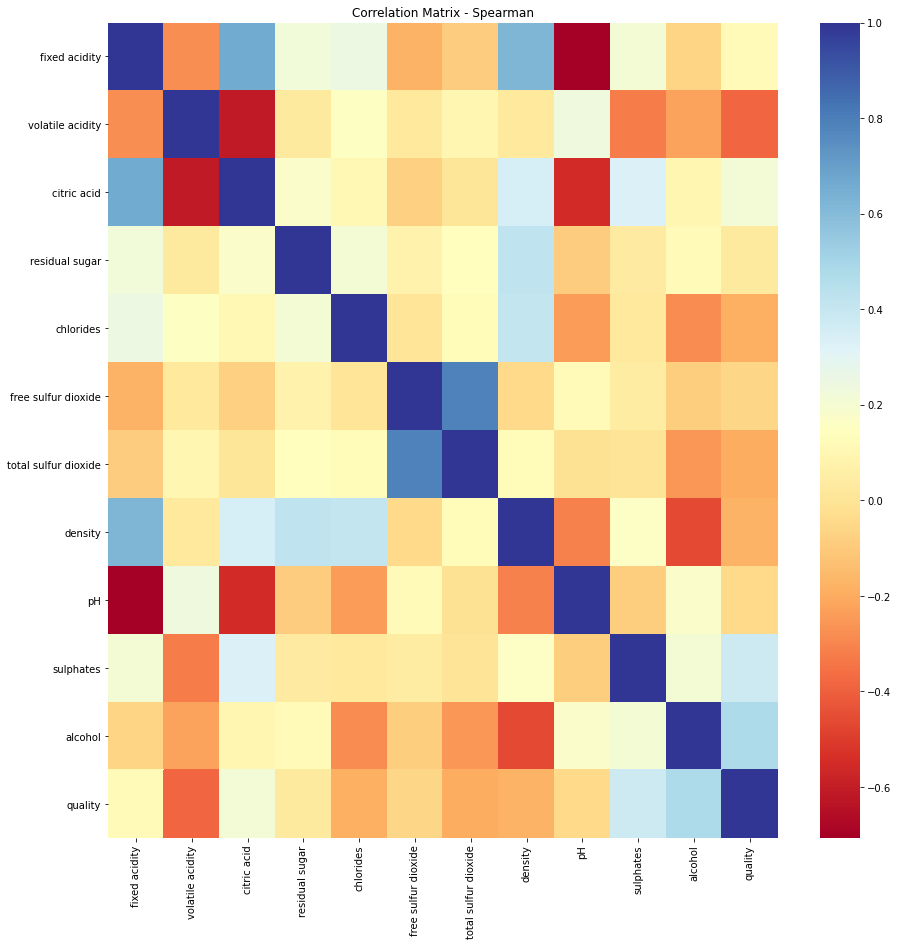

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(wine_df.corr(method='spearman'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()

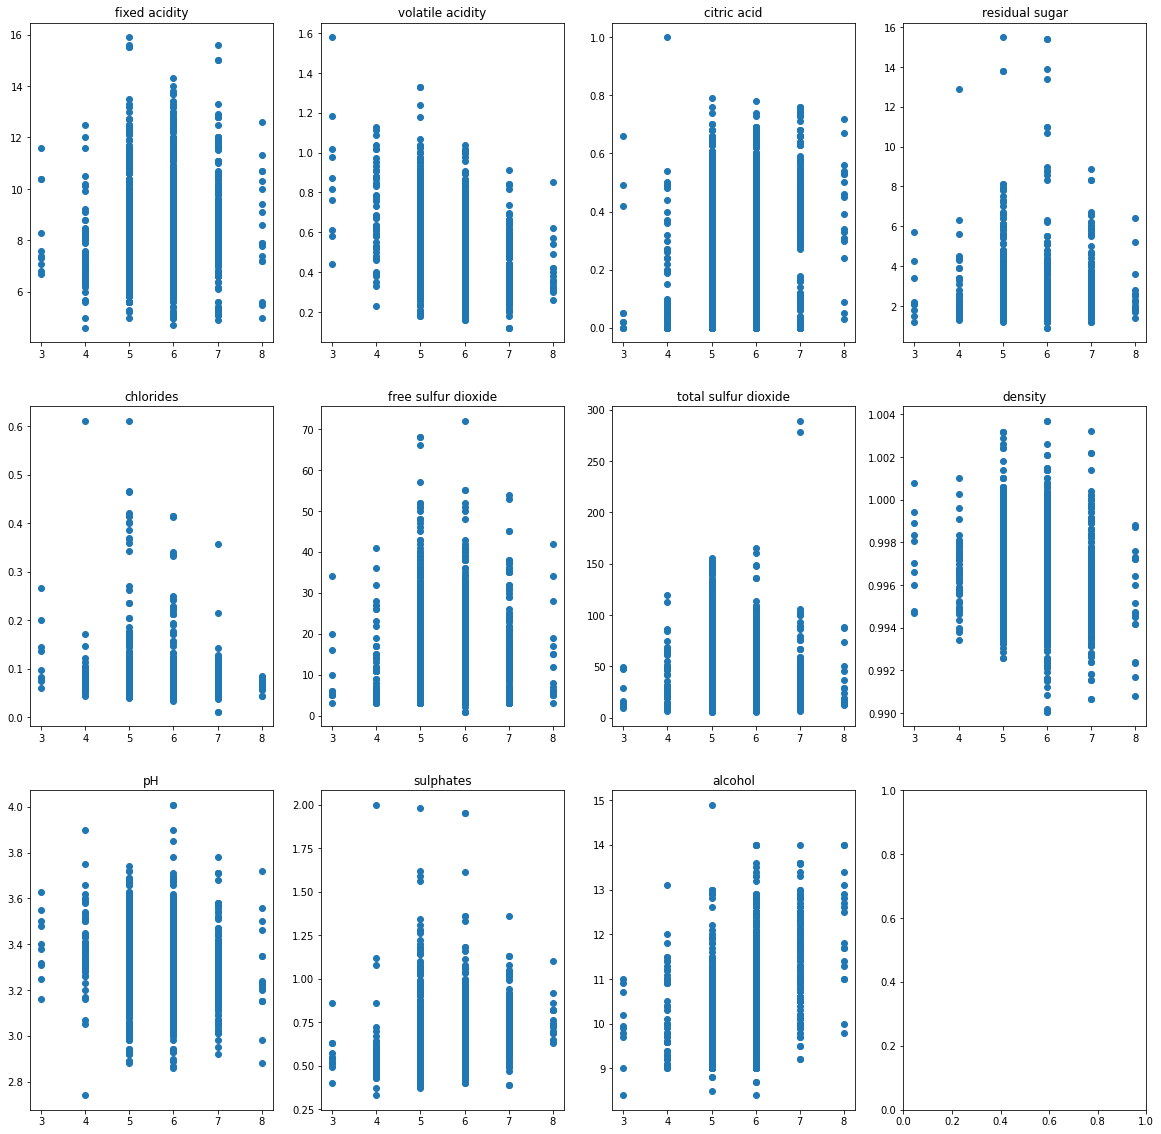

In [15]:
features = wine_df.columns[0:-1]
label = wine_df['quality']
f, ax = plt.subplots(3,4, figsize=(20,20))
i = 0
for j in range(3):
  for a in ax[j]:
    if i < 11:
      a.scatter(label, wine_df[features[i]])
      a.set_title(features[i])
      i += 1


In [17]:
corr_ord = sorted([(i,coef) for i, coef in zip(correlations.index, correlations['quality'])], key= lambda x : abs(x[1]), reverse=True)
corr_ord

[('quality', 1.0),
 ('alcohol', 0.47616632400114156),
 ('volatile acidity', -0.3905577802640094),
 ('sulphates', 0.25139707906926206),
 ('citric acid', 0.2263725143180432),
 ('total sulfur dioxide', -0.18510028892653843),
 ('density', -0.1749192277833492),
 ('chlorides', -0.12890655993005315),
 ('fixed acidity', 0.1240516491132247),
 ('pH', -0.0577313912053823),
 ('free sulfur dioxide', -0.05065605724427643),
 ('residual sugar', 0.013731637340066346)]

#Parte 2
Partiendo de los atributos de características del vino utilice el método de regresión 
lineal para predecir la calidad del mismo. Analice los resultados obtenidos. Revise y 
discuta si existen mecanismos para mejorar las métricas que arroja este modelo.

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

sample = 0.8
n_features = 6




df_train, df_test = train_test_split(wine_df, test_size=1-sample)

X_train = df_train[[i[0] for i in corr_ord[1:n_features]]]
X_test = df_test[[i[0] for i in corr_ord[1:n_features]]]
Y_train = df_train['quality']
Y_test = df_test['quality']


In [32]:
regr = linear_model.LinearRegression()


regr.fit(X_train, Y_train)


Y_pred = regr.predict(X_test)



print('MSE: %.2f'
      % mean_squared_error(Y_test, Y_pred))

print('R2: %.2f'
      % r2_score(Y_test, Y_pred))

print('MAE: %.2f'
      % mean_absolute_error(Y_test, Y_pred))

MSE: 0.47
R2: 0.39
MAE: 0.52


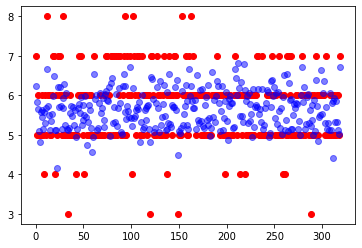

In [36]:
plt.scatter([i for i in range(len(Y_test))], Y_test,c='r')
plt.scatter([i for i in range(len(Y_test))], Y_pred,c='b', alpha=0.5)

In [39]:
import math
Y_pred_adapted = [math.floor(i) if abs(math.floor(i)-i) <= 0.5 else math.ceil(i) for i in Y_pred]

MSE: 0.55
R2: 0.29
MAE: 0.46


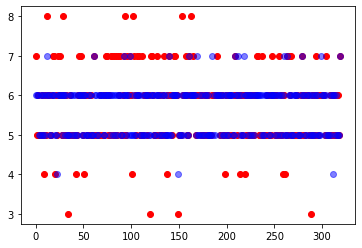

In [40]:
print('MSE: %.2f'
      % mean_squared_error(Y_test, Y_pred_adapted))

print('R2: %.2f'
      % r2_score(Y_test, Y_pred_adapted))

print('MAE: %.2f'
      % mean_absolute_error(Y_test, Y_pred_adapted))
plt.scatter([i for i in range(len(Y_test))], Y_test,c='r')
plt.scatter([i for i in range(len(Y_test))], Y_pred_adapted,c='b', alpha=0.5)

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=n_features).fit_transform(df_train[[i[0] for i in corr_ord[1:-1]]], Y_train)

In [44]:
pd.DataFrame(X_new)

,0,1,2,3,4,5
0,9.7,0.48,0.08,34.0,6.7,18.0
1,9.5,0.52,0.26,140.0,7.9,42.0
2,9.4,0.39,0.12,27.0,7.7,19.0
3,11.1,0.44,0.42,20.0,10.2,7.0
4,9.4,0.57,0.27,144.0,9.5,23.0
...,...,...,...,...,...,...
1274,11.5,0.50,0.29,14.0,7.6,5.0
1275,10.0,1.00,0.00,16.0,7.2,7.0
1276,11.7,0.53,0.49,17.0,10.9,10.0
1277,11.0,0.58,0.28,69.0,7.0,12.0


In [45]:
df_train[[i[0] for i in corr_ord[1:-1]]]

,alcohol,volatile acidity,sulphates,citric acid,total sulfur dioxide,density,chlorides,fixed acidity,pH,free sulfur dioxide
1525,9.7,0.48,0.64,0.08,34.0,0.99552,0.064,6.7,3.33,18.0
90,9.5,0.52,0.54,0.26,140.0,0.99640,0.079,7.9,3.23,42.0
990,9.4,0.39,0.49,0.12,27.0,0.99596,0.097,7.7,3.16,19.0
945,11.1,0.44,0.79,0.42,20.0,0.99566,0.071,10.2,3.14,7.0
772,9.4,0.57,0.55,0.27,144.0,0.99782,0.082,9.5,3.27,23.0
...,...,...,...,...,...,...,...,...,...,...
1169,11.5,0.50,0.62,0.29,14.0,0.99502,0.086,7.6,3.32,5.0
775,10.0,1.00,0.46,0.00,16.0,0.99586,0.102,7.2,3.43,7.0
558,11.7,0.53,0.56,0.49,17.0,1.00020,0.118,10.9,3.07,10.0
1257,11.0,0.58,0.70,0.28,69.0,0.99633,0.085,7.0,3.32,12.0


In [46]:
corr_ord[1:-1]

[('alcohol', 0.47616632400114156),
 ('volatile acidity', -0.3905577802640094),
 ('sulphates', 0.25139707906926206),
 ('citric acid', 0.2263725143180432),
 ('total sulfur dioxide', -0.18510028892653843),
 ('density', -0.1749192277833492),
 ('chlorides', -0.12890655993005315),
 ('fixed acidity', 0.1240516491132247),
 ('pH', -0.0577313912053823),
 ('free sulfur dioxide', -0.05065605724427643)]

In [48]:
regr = linear_model.LinearRegression()


regr.fit(X_new, Y_train)


Y_pred = regr.predict(df_test[['alcohol', 'volatile acidity','citric acid', 'total sulfur dioxide', 'fixed acidity','free sulfur dioxide']])



print('MSE: %.2f'
      % mean_squared_error(Y_test, Y_pred))

print('R2: %.2f'
      % r2_score(Y_test, Y_pred))

print('MAE: %.2f'
      % mean_absolute_error(Y_test, Y_pred))

MSE: 0.48
R2: 0.38
MAE: 0.53
